In [114]:
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

print("train shape:", train.shape)
print("test shape:", test.shape)

train shape: (26457, 20)
test shape: (10000, 19)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [97]:
train.isnull().sum()

index                0
gender               0
car                  0
reality              0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type        8157
family_size          0
begin_month          0
credit               0
age                  0
years_employed       0
ch_group             0
dtype: int64

In [7]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


<Axes: >

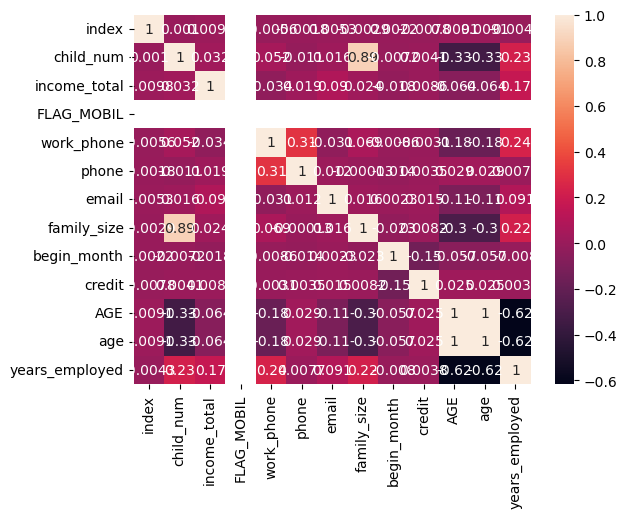

In [24]:
sns.heatmap(train.select_dtypes(include=[np.number]).corr(), annot=True)

In [26]:
train['car'].value_counts()

car
N    16410
Y    10047
Name: count, dtype: int64

In [27]:
train['reality'].value_counts()

reality
Y    17830
N     8627
Name: count, dtype: int64

In [30]:
train['child_num'].value_counts()

child_num
0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: count, dtype: int64

In [78]:
def freq_check(df, col):
    freq = pd.crosstab(index=df[col], columns=df['credit'], margins=True)
    pct = freq.div(freq.sum(axis=1),axis=0)
    combined = freq.astype(str) + "(" + pct.round(5).astype(str) + ")"
    return combined

freq_check(train, 'edu_type')

credit,0.0,1.0,2.0,All
edu_type,,,,
Academic degree,2(0.04348),7(0.15217),14(0.30435),23(0.5)
Higher education,909(0.06346),1751(0.12224),4502(0.3143),7162(0.5)
Incomplete higher,114(0.05588),246(0.12059),660(0.32353),1020(0.5)
Lower secondary,28(0.05447),59(0.11479),170(0.33074),257(0.5)
Secondary / secondary special,2169(0.06027),4204(0.11681),11622(0.32292),17995(0.5)
All,3222(0.06089),6267(0.11844),16968(0.32067),26457(0.5)


In [80]:
train = train[train['income_type']!='Student']
train = train[train['edu_type']!='Academic degree']

In [81]:
train['edu_type'].value_counts()

edu_type
Secondary / secondary special    17993
Higher education                  7157
Incomplete higher                 1020
Lower secondary                    257
Name: count, dtype: int64

In [105]:
train['email'].value_counts()

email
0    24017
1     2410
Name: count, dtype: int64

In [128]:
def make_childnum_group(item):
    if item == 0:
        return "no_child"
    elif 1<=item<=2:
        return "1or2"
    else:
        return "more3" 
    

    
def preprocess(df):

    df['occyp_type'] = df['occyp_type'].fillna("null")
    df['age'] = round(-df['DAYS_BIRTH']/365)
    df['years_employed'] = -df['DAYS_EMPLOYED']/365

    df['ch_group'] = df['child_num'].apply(make_childnum_group)
    df = df.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED','child_num', 'FLAG_MOBIL', 'index'],axis=1)

    df = df[df['income_type']!='Student']
    df = df[df['edu_type']!='Academic degree']

    return df

labelcol = ['gender','income_type','ch_group','car', 'reality','family_type',
            'house_type', 'edu_type', 'occyp_type']

def scaler(train, test):

    sc = StandardScaler()
    
    for col in labelcol:
        le = LabelEncoder()
        train[col] = le.fit_transform(train[col])
        test[col] = le.transform(test[col])

    return train, test

In [86]:
train['work_phone'].value_counts()

work_phone
0    20481
1     5946
Name: count, dtype: int64

In [93]:
freq_check(train, 'begin_month')

credit,0.0,1.0,2.0,All
begin_month,,,,
-60.0,22(0.04701),41(0.08761),171(0.36538),234(0.5)
-59.0,21(0.04339),49(0.10124),172(0.35537),242(0.5)
-58.0,25(0.05123),47(0.09631),172(0.35246),244(0.5)
-57.0,22(0.04825),37(0.08114),169(0.37061),228(0.5)
-56.0,34(0.06693),36(0.07087),184(0.3622),254(0.5)
...,...,...,...,...
-3.0,109(0.09191),470(0.39629),14(0.0118),593(0.5)
-2.0,87(0.09119),389(0.40776),1(0.00105),477(0.5)
-1.0,96(0.11566),319(0.38434),0(0.0),415(0.5)


In [129]:
train_ = preprocess(train)
test_ = preprocess(test)

train_, test_ = scaler(train_, test_)

In [130]:
train_.head()

,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age,years_employed,ch_group
0,0,0,0,202500.0,0,0,1,2,0,0,0,18,2.0,-6.0,1.0,38.0,12.901370,2
1,0,0,1,247500.0,0,3,0,1,0,0,1,8,3.0,-5.0,1.0,31.0,4.219178,0
2,1,1,1,450000.0,3,0,1,1,0,1,0,10,2.0,-22.0,2.0,52.0,12.147945,2
3,0,0,1,202500.0,0,3,1,1,0,1,0,14,2.0,-37.0,0.0,41.0,5.731507,2
4,0,1,1,157500.0,2,0,1,1,0,0,0,10,2.0,-26.0,2.0,41.0,5.767123,2
